In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-diffmats-cheb)

Here is a $4\times 4$ Chebyshev differentiation matrix.

In [2]:
t, Dₓ = FNC.diffcheb(3, [-1, 1])
Dₓ

4×4 Matrix{Float64}:
 -3.16667    4.0       -1.33333    0.5
 -1.0        0.333333   1.0       -0.333333
  0.333333  -1.0       -0.333333   1.0
 -0.5        1.33333   -4.0        3.16667

We again test the convergence rate.

In [3]:
f = x -> x + exp(sin(4x))
df_dx = x -> 1 + 4 * exp(sin(4x)) * cos(4x)
d2f_dx2 = x -> 4 * exp(sin(4x)) * (4 * cos(4x)^2 - 4 * sin(4x));

In [4]:
n = 5:5:70
err1 = zeros(size(n))
err2 = zeros(size(n))
for (k, n) in enumerate(n)
    t, Dₓ, Dₓₓ = FNC.diffcheb(n, [-1, 1])
    y = f.(t)
    err1[k] = norm(df_dx.(t) - Dₓ * y, Inf)
    err2[k] = norm(d2f_dx2.(t) - Dₓₓ * y, Inf)
end

Since we expect a spectral convergence rate, we use a semi-log plot for the error.

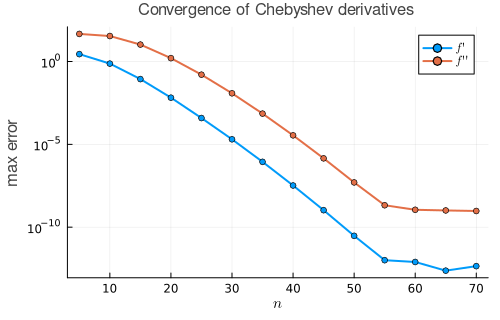

In [5]:
plot(n, [err1 err2]; m = :o,
    label=[L"f'" L"f''"],
    xaxis=(L"n"),  yaxis = (:log10, "max error"),
    title="Convergence of Chebyshev derivatives")